In [1]:
# Numpy library to use matrices
import numpy as np

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [2]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
#     plt.axis('off')
    plt.imshow(canvas, cmap="gray", norm=matplotlib.colors.NoNorm()) 
    plt.title(title)
    
def reset_canvas(size):
    return np.ones((size,size))
    


In [17]:
# Our draw funcion
def draw(canvas, x, y, v):
    N = canvas.shape[0]
    canvas[(N - 1) - y, x] = min(canvas[(N - 1) - y, x], v)
    return canvas


In [18]:
# Draw line without any aliasing
def line(canvas, x0, y0, x1, y1):
    
    dx = x1 - x0
    dy = y1 - y0
    # init
    d = 2 * dy - dx
    y = y0
    for x in range(x0, x1 + 1):

        canvas = draw(canvas, x, y, 0)

        if d < 0:
            # midpoint above line, choose E
            d = d + 2 * dy
        else:
            # midpoint below line, choose NE
            d = d + 2 * (dy - dx)
            y = y + 1
    return canvas

In [19]:
# Upsample function
def upsample(canvas):
    # We can actually do this very smartly, but for now let's stick to a very basic one
    new_canvas = reset_canvas(2 * canvas.shape[0])
    for j in range(new_canvas.shape[0]):
        for i in range(new_canvas.shape[1]):
            new_canvas[j, i] = canvas[j // 2, i // 2]
            
    return new_canvas

In [23]:
# Downsample function
def downsample(canvas):
    # We can actually do this very smartly, but for now let's stick to a very basic one
    new_canvas = reset_canvas(canvas.shape[0] // 2)
    for j in range(new_canvas.shape[0]):
        for i in range(new_canvas.shape[1]):
            # Average among four pixels
            cur = 1.0
            for k in range(2):
                for l in range(2):
                    cur += canvas[2 * j + k, 2 * i + l]
            new_canvas[j, i] = cur / 4.9
            
    return new_canvas

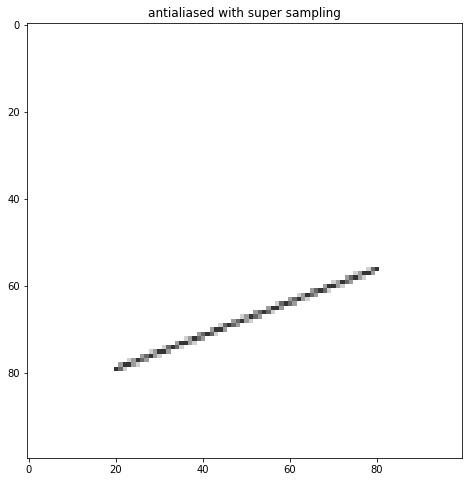

In [24]:
# Drawing a line with super sampling
def lineSSAA(canvas, x0, y0, x1, y1):
    
    # First draw a super-sampled image with double canvas (e.g.)
    canvasSS = upsample(canvas)
    # Draw the four lines
    for k in range(2):
        for l in range(2):
            canvasSS = line(
                canvasSS, 2 * x0 + k, 2 * y0 + l, 2 * x1 + k, 2 * y1 + l)
    # Down sample canvas
    canvas = downsample(canvasSS)
    
    return canvas
    

canvas = reset_canvas(N)
canvas = lineSSAA(canvas, 20, 20, 80, 43)
show_canvas(canvas, "antialiased with super sampling")